# Week 4 Jupyter Notebook - Logistic Regression and Feature Scaling 

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('dataset_phishin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [3]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Logistic Regression with Standard Scaling 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop URL column 
df = df.drop(columns=["url"], errors="ignore")

# Encode the target variable
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train logistic regression with random_state set
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print organized results
print("Logistic Regression WITH Standard Scaling and random_state=42")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Logistic Regression WITH Standard Scaling and random_state=42
Accuracy: 0.9490
Confusion Matrix:
[[1651   81]
 [  94 1603]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1732
           1       0.95      0.94      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



# Logistic Regression with MinMax Scaler

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop URL column if it exists
df = df.drop(columns=["url"], errors="ignore")

# Encode the target variable
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train logistic regression with random_state set
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred) 

# Prepare output
output = {
    "accuracy score": round(accuracy, 4),
    "confusion matrix": conf_matrix,
    "Classification Report": class_report
}


# Print organized results
print("Logistic Regression WITH MinMax Scaling and random_state=42")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Logistic Regression WITH MinMax Scaling and random_state=42
Accuracy: 0.9399
Confusion Matrix:
[[1630  102]
 [ 104 1593]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1732
           1       0.94      0.94      0.94      1697

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



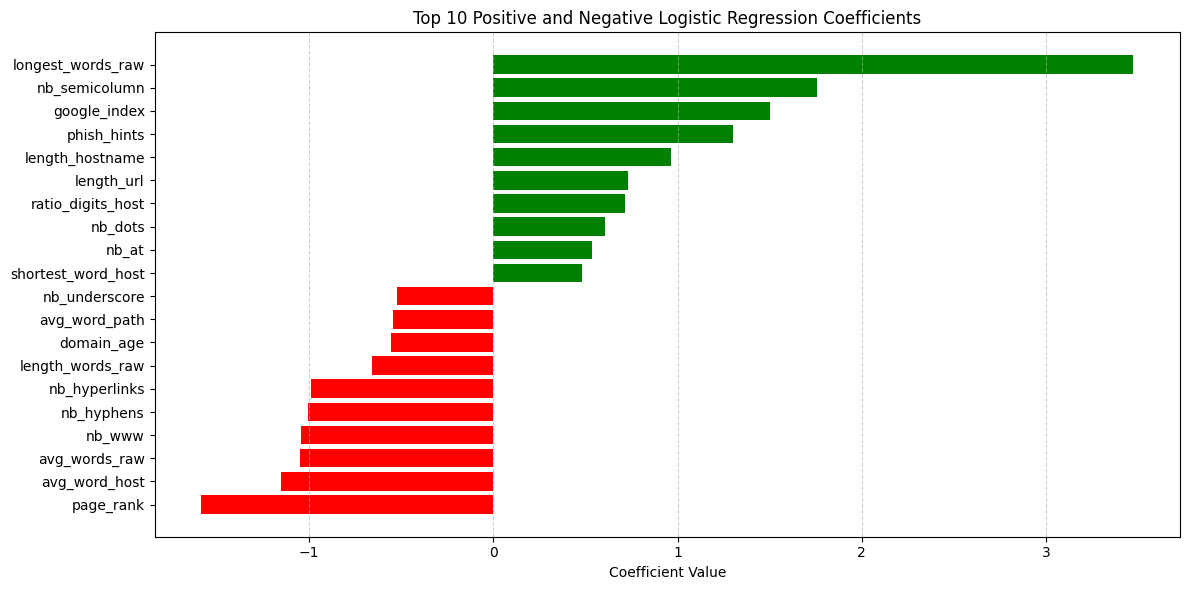

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("dataset_phishin.csv")
df = df.drop(columns=["url"], errors="ignore")
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Extract coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Top 10 positive and top 10 negative coefficients
top_positive = coef_df.head(10)
top_negative = coef_df.tail(10)

# Combine for plot
top_features = pd.concat([top_positive, top_negative])
top_features = top_features.sort_values(by="Coefficient")

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_features["Feature"], top_features["Coefficient"], color=["red" if c < 0 else "green" for c in top_features["Coefficient"]])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Positive and Negative Logistic Regression Coefficients")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




In Week 4, I focused on applying logistic regression to the phishing dataset, emphasizing the impact of feature scaling on model performance. I used two widely adopted scaling techniques: StandardScaler, which standardizes features by removing the mean and scaling to unit variance, and MinMaxScaler, which scales features to a fixed range between 0 and 1. After scaling, I trained a logistic regression model with random_state=42 to ensure reproducibility. With StandardScaler, the model achieved an accuracy of 0.9490, while the MinMaxScaler version resulted in a slightly lower accuracy of 0.9399. To evaluate both models, I used the confusion matrix and classification report, which provided insights into precision, recall, and f1-score for both phishing and legitimate classes. Additionally, I visualized the top 10 positive and top 10 negative coefficients from the logistic regression model using a horizontal bar chart, which helped interpret which features had the most significant impact on predictions.